In [1]:
import numpy as np
import matplotlib.pyplot as plt

import string
import random
import re
import requests
import os
import textwrap

# Creating a substituation cypher

We will be creating a cypher so that later we can find it.

In [2]:
letters1 = list(string.ascii_lowercase)
letters2 = list(string.ascii_lowercase)

In [3]:
true_mapping = {}

# shuffle second set of letters
random.shuffle(letters2)

# populate map
for k, v in zip(letters1, letters2):
    true_mapping[k] = v

# Language Model

First we would be creating a markov matrix for the alphabets and initiate it with 1's to avoid zeros in our data and would be using an appropriate denominator. similarly we are creating a matrix with zeroes for all the letters for the first letter count.

We are creating functions so that we can update this matrix going forward based on data so we know the general probabilities of text combinations. 



In [4]:
### the language model

# initialize Markov matrix
M = np.ones((26, 26))

# initial state distribution
pi = np.zeros(26)

# a function to update the Markov matrix
def update_transition(ch1, ch2):
    # ord('a') = 97, ord('b') = 98, ...
    i = ord(ch1) - 97
    j = ord(ch2) - 97
    M[i,j] += 1

# a function to update the initial state distribution
def update_pi(ch):
    i = ord(ch) - 97
    pi[i] += 1

- Below we are building functions that will assign probability values to words and sentences. 

In [5]:
# get the log-probability of a word / token
def get_word_prob(word):
    # print("word:", word)
    i = ord(word[0]) - 97
    logp = np.log(pi[i])

    for ch in word[1:]:
        j = ord(ch) - 97
        logp += np.log(M[i, j]) # update prob
        i = j # update j

    return logp

# get the probability of a sequence of words
def get_sequence_prob(words):
    # if input is a string, split into an array of tokens
    if type(words) == str:
        words = words.split()
    
    logp = 0
    for word in words:
        logp += get_word_prob(word)
    return logp

- Let us get abook ( here we are using moby dick text that is cleaned for the analysis). save it into the working directory.

In [6]:
### create a markov model based on an English dataset
# is an edit of https://www.gutenberg.org/ebooks/2701
# (I removed the front and back matter)

# download the file
if not os.path.exists('moby_dick.txt'):
    print("Downloading moby dick...")
    r = requests.get('https://lazyprogrammer.me/course_files/moby_dick.txt')
    with open('moby_dick.txt', 'w', encoding="utf-8") as f:
        f.write(r.content.decode())
        

Now we will use functions that we have made earlier to update the probabilities of each letter and also the probabilities of each bigrams 

In [7]:
# for replacing non-alpha characters
regex = re.compile('[^a-zA-Z]')

# load in words
for line in open('moby_dick.txt', encoding="utf-8"):
    line = line.rstrip()
    print(line)

# there are blank lines in the file
    if line:
        line = regex.sub(' ', line) # replace all non-alpha characters with space
        # split the tokens in the line and lowercase
        tokens = line.lower().split()

        for token in tokens:
      # update the model

      # first letter
            ch0 = token[0]
            update_pi(ch0)

      # other letters
            for ch1 in token[1:]:
                update_transition(ch0, ch1)
                ch0 = ch1

# normalize the probabilities
pi /= pi.sum()
M /= M.sum(axis=1, keepdims=True)

﻿CHAPTER 1. Loomings.



Call me Ishmael. Some years ago—never mind how long precisely—having

little or no money in my purse, and nothing particular to interest me

on shore, I thought I would sail about a little and see the watery part

of the world. It is a way I have of driving off the spleen and

regulating the circulation. Whenever I find myself growing grim about

the mouth; whenever it is a damp, drizzly November in my soul; whenever

I find myself involuntarily pausing before coffin warehouses, and

bringing up the rear of every funeral I meet; and especially whenever

my hypos get such an upper hand of me, that it requires a strong moral

principle to prevent me from deliberately stepping into the street, and

methodically knocking people’s hats off—then, I account it high time to

get to sea as soon as I can. This is my substitute for pistol and ball.

With a philosophical flourish Cato throws himself upon his sword; I

quietly take to the ship. There is nothing surprising i

those black-bordered marbles which cover no ashes! What despair in

those immovable inscriptions! What deadly voids and unbidden

infidelities in the lines that seem to gnaw upon all Faith, and refuse

resurrections to the beings who have placelessly perished without a

grave. As well might those tablets stand in the cave of Elephanta as

here.



In what census of living creatures, the dead of mankind are included;

why it is that a universal proverb says of them, that they tell no

tales, though containing more secrets than the Goodwin Sands; how it is

that to his name who yesterday departed for the other world, we prefix

so significant and infidel a word, and yet do not thus entitle him, if

he but embarks for the remotest Indies of this living earth; why the

Life Insurance Companies pay death-forfeitures upon immortals; in what

eternal, unstirring paralysis, and deadly, hopeless trance, yet lies

antique Adam who died sixty round centuries ago; how it is that we

still refuse t


over with curious carving; and the bottom of which was formed of a

stout interlacing of the same elastic stuff of which the wigwam was

constructed.



There was nothing so very particular, perhaps, about the appearance of

the elderly man I saw; he was brown and brawny, like most old seamen,

and heavily rolled up in blue pilot-cloth, cut in the Quaker style;

only there was a fine and almost microscopic net-work of the minutest

wrinkles interlacing round his eyes, which must have arisen from his

continual sailings in many hard gales, and always looking to

windward;—for this causes the muscles about the eyes to become pursed

together. Such eye-wrinkles are very effectual in a scowl.



“Is this the Captain of the Pequod?” said I, advancing to the door of

the tent.



“Supposing it be the captain of the Pequod, what dost thou want of

him?” he demanded.



“I was thinking of shipping.”



“Thou wast, wast thou? I see thou art no Nantucketer—ever been in a

stove boat?”



“No, S


it known, in addition to his other officers, was one of the licensed

pilots of the port—he being suspected to have got himself made a pilot

in order to save the Nantucket pilot-fee to all the ships he was

concerned in, for he never piloted any other craft—Bildad, I say, might

now be seen actively engaged in looking over the bows for the

approaching anchor, and at intervals singing what seemed a dismal stave

of psalmody, to cheer the hands at the windlass, who roared forth some

sort of a chorus about the girls in Booble Alley, with hearty good

will. Nevertheless, not three days previous, Bildad had told them that

no profane songs would be allowed on board the Pequod, particularly in

getting under weigh; and Charity, his sister, had placed a small choice

copy of Watts in each seaman’s berth.



Meantime, overseeing the other part of the ship, Captain Peleg ripped

and swore astern in the most frightful manner. I almost thought he

would sink the ship before the anchor could b


precise purpose this ivory horn or lance answers, it would be hard to

say. It does not seem to be used like the blade of the sword-fish and

bill-fish; though some sailors tell me that the Narwhale employs it for

a rake in turning over the bottom of the sea for food. Charley Coffin

said it was used for an ice-piercer; for the Narwhale, rising to the

surface of the Polar Sea, and finding it sheeted with ice, thrusts his

horn up, and so breaks through. But you cannot prove either of these

surmises to be correct. My own opinion is, that however this one-sided

horn may really be used by the Narwhale—however that may be—it would

certainly be very convenient to him for a folder in reading pamphlets.

The Narwhale I have heard called the Tusked whale, the Horned whale,

and the Unicorn whale. He is certainly a curious example of the

Unicornism to be found in almost every kingdom of animated nature. From

certain cloistered old authors I have gathered that this same

sea-unicorn’s ho

superstitiousness hereditary to all sailors; but of all sailors, they

are by all odds the most directly brought into contact with whatever is

appallingly astonishing in the sea; face to face they not only eye its

greatest marvels, but, hand to jaw, give battle to them. Alone, in such

remotest waters, that though you sailed a thousand miles, and passed a

thousand shores, you would not come to any chiseled hearth-stone, or

aught hospitable beneath that part of the sun; in such latitudes and

longitudes, pursuing too such a calling as he does, the whaleman is

wrapped by influences all tending to make his fancy pregnant with many

a mighty birth.



No wonder, then, that ever gathering volume from the mere transit over

the widest watery spaces, the outblown rumors of the White Whale did in

the end incorporate with themselves all manner of morbid hints, and

half-formed fœtal suggestions of supernatural agencies, which

eventually invested Moby Dick with new terrors unborrowed from

mastership; for to the purely spiritual, the intellectual but stand in

a sort of corporeal relation. Starbuck’s body and Starbuck’s coerced

will were Ahab’s, so long as Ahab kept his magnet at Starbuck’s brain;

still he knew that for all this the chief mate, in his soul, abhorred

his captain’s quest, and could he, would joyfully disintegrate himself

from it, or even frustrate it. It might be that a long interval would

elapse ere the White Whale was seen. During that long interval Starbuck

would ever be apt to fall into open relapses of rebellion against his

captain’s leadership, unless some ordinary, prudential, circumstantial

influences were brought to bear upon him. Not only that, but the subtle

insanity of Ahab respecting Moby Dick was noways more significantly

manifested than in his superlative sense and shrewdness in foreseeing

that, for the present, the hunt should in some way be stripped of that

strange imaginative impiousness which naturally invested it; that the



fain be not ungrateful; but it is often one of the prime redeeming

qualities of your man of violence, that at times he has as stiff an arm

to back a poor stranger in a strait, as to plunder a wealthy one. In

sum, gentlemen, what the wildness of this canal life is, is

emphatically evinced by this; that our wild whale-fishery contains so

many of its most finished graduates, and that scarce any race of

mankind, except Sydney men, are so much distrusted by our whaling

captains. Nor does it at all diminish the curiousness of this matter,

that to many thousands of our rural boys and young men born along its

line, the probationary life of the Grand Canal furnishes the sole

transition between quietly reaping in a Christian corn-field, and

recklessly ploughing the waters of the most barbaric seas.



“‘I see! I see!’ impetuously exclaimed Don Pedro, spilling his chicha

upon his silvery ruffles. ‘No need to travel! The world’s one Lima. I

had thought, now, that at your temperate Nor


him. So that with ease he elevates it in the air, and invariably does

so when going at his utmost speed. Besides, such is the breadth of the

upper part of the front of his head, and such the tapering cut-water

formation of the lower part, that by obliquely elevating his head, he

thereby may be said to transform himself from a bluff-bowed sluggish

galliot into a sharppointed New York pilot-boat.



“Start her, start her, my men! Don’t hurry yourselves; take plenty of

time—but start her; start her like thunder-claps, that’s all,” cried

Stubb, spluttering out the smoke as he spoke. “Start her, now; give ’em

the long and strong stroke, Tashtego. Start her, Tash, my boy—start

her, all; but keep cool, keep cool—cucumbers is the word—easy,

easy—only start her like grim death and grinning devils, and raise the

buried dead perpendicular out of their graves, boys—that’s all. Start

her!”



“Woo-hoo! Wa-hee!” screamed the Gay-Header in reply, raising some old

war-whoop to the skies;

multitudes of sharks that had before swum round the Sperm Whale’s body,

rushed to the fresh blood that was spilled, thirstily drinking at every

new gash, as the eager Israelites did at the new bursting fountains

that poured from the smitten rock.



At last his spout grew thick, and with a frightful roll and vomit, he

turned upon his back a corpse.



While the two headsmen were engaged in making fast cords to his flukes,

and in other ways getting the mass in readiness for towing, some

conversation ensued between them.



“I wonder what the old man wants with this lump of foul lard,” said

Stubb, not without some disgust at the thought of having to do with so

ignoble a leviathan.



“Wants with it?” said Flask, coiling some spare line in the boat’s bow,

“did you never hear that the ship which but once has a Sperm Whale’s

head hoisted on her starboard side, and at the same time a Right

Whale’s on the larboard; did you never hear, Stubb, that that ship can

never afterwards cap




There are some enterprises in which a careful disorderliness is the

true method.



The more I dive into this matter of whaling, and push my researches up

to the very spring-head of it so much the more am I impressed with its

great honorableness and antiquity; and especially when I find so many

great demi-gods and heroes, prophets of all sorts, who one way or other

have shed distinction upon it, I am transported with the reflection

that I myself belong, though but subordinately, to so emblazoned a

fraternity.



The gallant Perseus, a son of Jupiter, was the first whaleman; and to

the eternal honor of our calling be it said, that the first whale

attacked by our brotherhood was not killed with any sordid intent.

Those were the knightly days of our profession, when we only bore arms

to succor the distressed, and not to fill men’s lamp-feeders. Every one

knows the fine story of Perseus and Andromeda; how the lovely

Andromeda, the daughter of a king, was tied to a rock on t


respective shares; up steps a very learned and most Christian and

charitable gentleman, with a copy of Blackstone under his arm; and

laying it upon the whale’s head, he says—“Hands off! this fish, my

masters, is a Fast-Fish. I seize it as the Lord Warden’s.” Upon this

the poor mariners in their respectful consternation—so truly

English—knowing not what to say, fall to vigorously scratching their

heads all round; meanwhile ruefully glancing from the whale to the

stranger. But that did in nowise mend the matter, or at all soften the

hard heart of the learned gentleman with the copy of Blackstone. At

length one of them, after long scratching about for his ideas, made

bold to speak,



“Please, sir, who is the Lord Warden?”



“The Duke.”



“But the duke had nothing to do with taking this fish?”



“It is his.”



“We have been at great trouble, and peril, and some expense, and is all

that to go to the Duke’s benefit; we getting nothing at all for our

pains but our blisters?”


tower, cutting my boat in two, leaving each half in splinters; and,

flukes first, the white hump backed through the wreck, as though it was

all chips. We all struck out. To escape his terrible flailings, I

seized hold of my harpoon-pole sticking in him, and for a moment clung

to that like a sucking fish. But a combing sea dashed me off, and at

the same instant, the fish, taking one good dart forwards, went down

like a flash; and the barb of that cursed second iron towing along near

me caught me here” (clapping his hand just below his shoulder); “yes,

caught me just here, I say, and bore me down to Hell’s flames, I was

thinking; when, when, all of a sudden, thank the good God, the barb

ript its way along the flesh—clear along the whole length of my

arm—came out nigh my wrist, and up I floated;—and that gentleman there

will tell you the rest (by the way, captain—Dr. Bunger, ship’s surgeon:

Bunger, my lad,—the captain). Now, Bunger boy, spin your part of the

yarn.”



The p


being calm weather, they broke out deeper and deeper, disturbing the

slumbers of the huge ground-tier butts; and from that black midnight

sending those gigantic moles into the daylight above. So deep did they

go; and so ancient, and corroded, and weedy the aspect of the lowermost

puncheons, that you almost looked next for some mouldy corner-stone

cask containing coins of Captain Noah, with copies of the posted

placards, vainly warning the infatuated old world from the flood.

Tierce after tierce, too, of water, and bread, and beef, and shooks of

staves, and iron bundles of hoops, were hoisted out, till at last the

piled decks were hard to get about; and the hollow hull echoed under

foot, as if you were treading over empty catacombs, and reeled and

rolled in the sea like an air-freighted demijohn. Top-heavy was the

ship as a dinnerless student with all Aristotle in his head. Well was

it that the Typhoons did not visit them then.



Now, at this time it was that my poor paga


one had only been juggling her.



Meanwhile, whatever were his own secret thoughts, Starbuck said

nothing, but quietly he issued all requisite orders; while Stubb and

Flask—who in some small degree seemed then to be sharing his

feelings—likewise unmurmuringly acquiesced. As for the men, though some

of them lowly rumbled, their fear of Ahab was greater than their fear

of Fate. But as ever before, the pagan harpooneers remained almost

wholly unimpressed; or if impressed, it was only with a certain

magnetism shot into their congenial hearts from inflexible Ahab’s.



For a space the old man walked the deck in rolling reveries. But

chancing to slip with his ivory heel, he saw the crushed copper

sight-tubes of the quadrant he had the day before dashed to the deck.



“Thou poor, proud heaven-gazer and sun’s pilot! yesterday I wrecked

thee, and to-day the compasses would fain have wrecked me. So, so. But

Ahab is lord over the level loadstone yet. Mr. Starbuck—a lance without

a 


some further point; like as this pilot stands by his compass, and takes

the precise bearing of the cape at present visible, in order the more

certainly to hit aright the remote, unseen headland, eventually to be

visited: so does the fisherman, at his compass, with the whale; for

after being chased, and diligently marked, through several hours of

daylight, then, when night obscures the fish, the creature’s future

wake through the darkness is almost as established to the sagacious

mind of the hunter, as the pilot’s coast is to him. So that to this

hunter’s wondrous skill, the proverbial evanescence of a thing writ in

water, a wake, is to all desired purposes well nigh as reliable as the

steadfast land. And as the mighty iron Leviathan of the modern railway

is so familiarly known in its every pace, that, with watches in their

hands, men time his rate as doctors that of a baby’s pulse; and lightly

say of it, the up train or the down train will reach such or such a

spot, at s

# Encoding and Decoding of message


## Encoding message

- We are taking a paragraph and we will first encode it and later use our model to decode it without using the cipher that we know of

In [11]:

original_message = '''I then lounged down the street and found,
as I expected, that there was a mews in a lane which runs down
by one wall of the garden. I lent the ostlers a hand in rubbing
down their horses, and received in exchange twopence, a glass of
half-and-half, two fills of shag tobacco, and as much information
as I could desire about Miss Adler, to say nothing of half a dozen
other people in the neighbourhood in whom I was not in the least
interested, but whose biographies I was compelled to listen to.
'''


In the encoder function we will take a message as an input and change letters in that message according to the true mapping (which we can later compare with ur prediction). 

In [41]:
def encoder(msg):
    msg = msg.lower()
    msg = regex.sub(' ',msg)
    
    crypt = []
    for ch in msg:
        if ch in letters1:
            crypt.append(true_mapping[ch])
        else:
            crypt.append(ch)
            #print(ch)
    
    enc_msg = "".join(crypt)
    
    return enc_msg

In [42]:
encoded_message = encoder(original_message)

In [43]:
print(encoded_message)

m wqly ofeyslc cfjy wql rwhllw nyc pfeyc  nr m lxbldwlc  wqnw wqlhl jnr n kljr my n onyl jqmdq heyr cfjy ai fyl jnoo fp wql snhcly  m olyw wql frwolhr n qnyc my heaamys cfjy wqlmh qfhrlr  nyc hldlmzlc my lxdqnysl wjfblydl  n sonrr fp qnop nyc qnop  wjf pmoor fp rqns wfanddf  nyc nr kedq mypfhknwmfy nr m dfeoc clrmhl nafew kmrr ncolh  wf rni yfwqmys fp qnop n cfgly fwqlh blfbol my wql ylmsqafehqffc my jqfk m jnr yfw my wql olnrw mywlhlrwlc  aew jqfrl amfshnbqmlr m jnr dfkbloolc wf omrwly wf  


- We can see that the encoder function encoded the message comfortably. let us make a decode function which we will use going forward to check the message.

In [45]:
def decode_message(msg, word_map):
    decoded_msg = []
    for ch in msg:
        decoded_ch = ch # could just be a space
        if ch in word_map:
            decoded_ch = word_map[ch]
        decoded_msg.append(decoded_ch)

    return ''.join(decoded_msg)

- Creating dna_pool which will have twenty different schuffled versions of alphabets.

In [63]:
dna_pool = []
for _ in range(20):
    dna = list(string.ascii_lowercase)
    random.shuffle(dna)
    dna_pool.append(dna)

- We will check the markovmodel scores for each of these in dna_pool and then pick the top 5 and then create children for those.
- Children here implies schuffels that are slightly different from the existing one with only one letter place exchanged.

In [48]:
def evolve_offspring(dna_pool, n_children):
  # make n_children per offspring
    offspring = []

    for dna in dna_pool:
        for _ in range(n_children):
            copy = dna.copy()
            j = np.random.randint(len(copy))
            k = np.random.randint(len(copy))

      # switch
        tmp = copy[j]
        copy[j] = copy[k]
        copy[k] = tmp
        offspring.append(copy)

    return offspring + dna_pool

- Now we will write a loop such that we will go through dna_pool and exchange the letters and check the scores and so on till we hit a ceiling.

In [59]:
num_iters = 1400
scores = np.zeros(num_iters)
best_dna = None
best_map = None
best_score = float('-inf')

for i in range(num_iters):
    if i > 0:
        # get offspring from the current dna pool
        dna_pool = evolve_offspring(dna_pool, 3)
        
        
    # calculate score for each dna
    dna2score = {}
    for dna in dna_pool:
    # populate map
        current_map = {}
        for k, v in zip(letters1, dna):
            current_map[k] = v

        decoded_message = decode_message(encoded_message, current_map)
        score = get_sequence_prob(decoded_message)
        
        
        # store it
        # needs to be a string to be a dict key
        dna2score[''.join(dna)] = score
        
        if score > best_score:
            best_dna = dna
            best_map = current_map
            best_score = score
            
    scores[i] = np.mean(list(dna2score.values()))
    
    # keep the best 5 dna
    # also turn them back into list of single chars
    sorted_dna = sorted(dna2score.items(), key=lambda x: x[1], reverse=True)
    dna_pool = [list(k) for k, v in sorted_dna[:5]]
    
    if i % 200 == 0:
        print("iter:", i, "score:", scores[i], "best so far:", best_score)



iter: 0 score: -2110.5828894933484 best so far: -1864.899970805194
iter: 200 score: -1238.0662855029545 best so far: -1172.0449242948168
iter: 400 score: -1123.261923645412 best so far: -1090.2253532886477
iter: 600 score: -1071.1949511954574 best so far: -1009.7138697470152
iter: 800 score: -1022.0575701856005 best so far: -943.7730498888869
iter: 1000 score: -997.4176603190815 best so far: -929.5902922650557
iter: 1200 score: -1026.239145724993 best so far: -929.5902922650557


- Let us check the difference between true and the predicted values.
- At times these may vary a lot which can be due to the initial 20 sets. If you re do this with a different 20 sets you might get a better result then.

In [60]:
# use best score
decoded_message = decode_message(encoded_message, best_map)

print("LL of decoded message:", get_sequence_prob(decoded_message))
print("LL of true message:", get_sequence_prob(regex.sub(' ', original_message.lower())))


# which letters are wrong?
for true, v in true_mapping.items():
    pred = best_map[v]
    if true != pred:
        print("true: %s, pred: %s" % (true, pred))

LL of decoded message: -929.5902922650557
LL of true message: -933.0312453751817
true: j, pred: z
true: k, pred: j
true: z, pred: k


In [61]:
# print the final decoded message
print("Decoded message:\n", textwrap.fill(decoded_message))

print("\nTrue message:\n", original_message)

Decoded message:
 i then lounged down the street and found  as i expected  that there
was a mews in a lane which runs down by one wall of the garden  i lent
the ostlers a hand in rubbing down their horses  and received in
exchange twopence  a glass of half and half  two fills of shag tobacco
and as much information as i could desire about miss adler  to say
nothing of half a doken other people in the neighbourhood in whom i
was not in the least interested  but whose biographies i was compelled
to listen to

True message:
 I then lounged down the street and found,
as I expected, that there was a mews in a lane which runs down
by one wall of the garden. I lent the ostlers a hand in rubbing
down their horses, and received in exchange twopence, a glass of
half-and-half, two fills of shag tobacco, and as much information
as I could desire about Miss Adler, to say nothing of half a dozen
other people in the neighbourhood in whom I was not in the least
interested, but whose biographies I was 

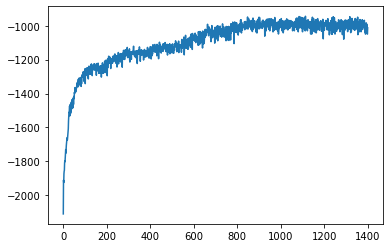

In [62]:
plt.plot(scores)
plt.show()